IMPORT LIBRARIES

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

LOAD THE DATASET

In [44]:
df = pd.read_csv("employee_data.csv")
df

,Employee_ID,Age,Experience,Salary
0,101,59.0,NaN,59107.0
1,102,NaN,19.0,NaN
2,103,28.0,4.0,66107.0
3,104,NaN,17.0,62587.0
4,105,32.0,23.0,35549.0
5,106,37.0,20.0,32538.0
6,107,29.0,26.0,69295.0
7,108,42.0,NaN,45467.0
8,109,38.0,15.0,36550.0
9,110,55.0,20.0,NaN


INFORMATION ABOUT THE DATASET

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee_ID  30 non-null     int64  
 1   Age          25 non-null     float64
 2   Experience   25 non-null     float64
 3   Salary       25 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.1 KB


target = dependent varable

feature = independent variable(age,experience)

In [46]:
df['Age']=df['Age'].fillna(0)
df['Experience']=df['Experience'].fillna(0)
df = df.drop(df[df['Salary'] == 0].index)

In [47]:
df = df.dropna(subset=['Salary'])

In [48]:
df.head()

,Employee_ID,Age,Experience,Salary
0,101,59.0,0.0,59107.0
2,103,28.0,4.0,66107.0
3,104,0.0,17.0,62587.0
4,105,32.0,23.0,35549.0
5,106,37.0,20.0,32538.0


Define features and target

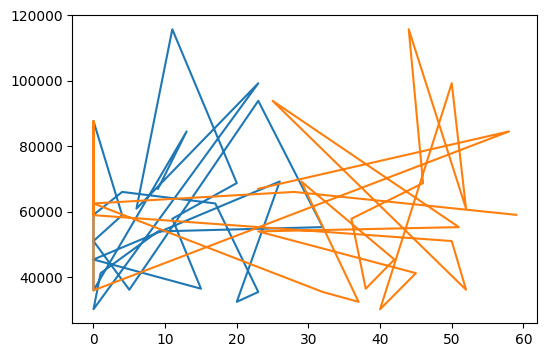

In [49]:
x = df[["Experience","Age"]]
y = df["Salary"]
plt.figure(figsize=(6, 4))
plt.plot(x,y)
plt.show()

Observation: The graph shows a non-linear relationship.

Split into training and testing sets

In [50]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,train_size=0.8,random_state=42)

In [51]:
ploy = PolynomialFeatures(degree=2, include_bias=False)
xploy = ploy.fit_transform(Xtrain)

In [52]:
model = LinearRegression()
model.fit(xploy, Ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
x_test_ploy = ploy.transform(Xtest)

In [54]:
ypred = model.predict(x_test_ploy)
r2_score(Ytest, ypred)

-0.7314141178710825

In [55]:
import seaborn as sns

NameError: name 'pred' is not defined

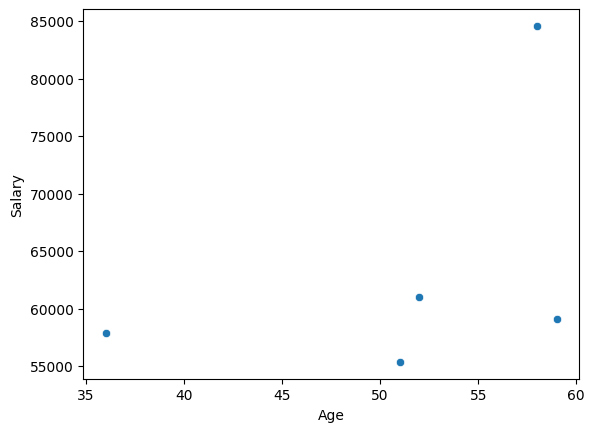

In [56]:
sns.scatterplot(data=Xtest, x="Age", y = Ytest)
sns.scatterplot(data=Xtest, x="Age", y = pred)

<Axes: xlabel='Experience', ylabel='Salary'>

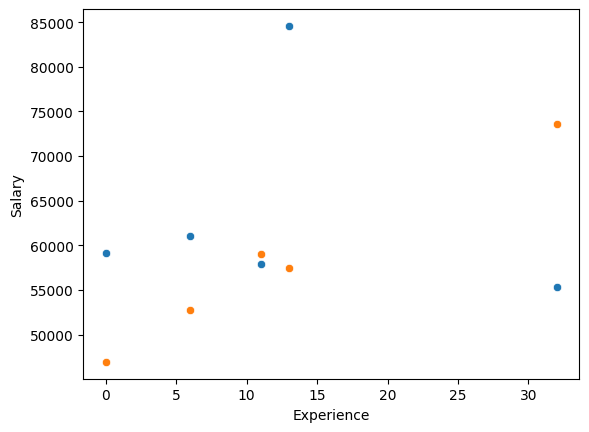

In [ ]:
sns.scatterplot(data=Xtest, x="Experience", y = Ytest)
sns.scatterplot(data=Xtest, x="Experience", y = pred)